#  Project 1 - Bike Renting
The objective is to predict the count of bikes rented on daily basis based on the environmental and seasonal conditions.

In [1]:
# Load Libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fancyimpute import KNN
from random import randrange, uniform 
import seaborn as sns
from sklearn.metrics import r2_score
from scipy import stats
from matplotlib import pyplot

Using TensorFlow backend.


# Data Pre-Processing

In [2]:
# Set working directory 
os.chdir("F:\\DATA SCIENCE\\# Project\\1")

# Confirm working directory 
os.getcwd()

'F:\\DATA SCIENCE\\# Project\\1'

In [3]:
# Loading dataset
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# Exploratory Data Analysis

In [4]:
df.shape

(731, 16)

In [5]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [6]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [7]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [8]:
df.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [9]:
# Dropping Reductant variables 
# Drop "instant" variable as it's just an index 
df = df.drop(['instant'], axis = 1)

# Drop "dteday" Variable as the prediction is to be done on Seasonal basis
df = df.drop(['dteday'], axis = 1)

# Drop " casual" and "registered" variable as cnt is sum of these both
df = df.drop(['casual', 'registered'], axis = 1)

In [10]:
# Rename the Variables for better understanding 
df = df.rename(columns={'yr':'year', 'mnth':'month', 'weathersit':'weather', 'temp':'temperature', 'hum':'humidity', 'cnt':'count'})
df.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weather', 'temperature', 'atemp', 'humidity', 'windspeed', 'count'],
      dtype='object')

In [11]:
df.dtypes

season           int64
year             int64
month            int64
holiday          int64
weekday          int64
workingday       int64
weather          int64
temperature    float64
atemp          float64
humidity       float64
windspeed      float64
count            int64
dtype: object

In [12]:
# Sepearting categorical and continous Variables

# categorical variables 
cat_names = ['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weather']

# continous variables
cnames = ['temperature', 'atemp', 'humidity', 'windspeed', 'count']


In [13]:
#cnames = pd.Series(['temperature', 'atemp', 'humidity', 'windspeed', 'count'])
#cnames

In [14]:
for i in cnames:
    print(df.loc[:,i].describe())

count    731.000000
mean       0.495385
std        0.183051
min        0.059130
25%        0.337083
50%        0.498333
75%        0.655417
max        0.861667
Name: temperature, dtype: float64
count    731.000000
mean       0.474354
std        0.162961
min        0.079070
25%        0.337842
50%        0.486733
75%        0.608602
max        0.840896
Name: atemp, dtype: float64
count    731.000000
mean       0.627894
std        0.142429
min        0.000000
25%        0.520000
50%        0.626667
75%        0.730209
max        0.972500
Name: humidity, dtype: float64
count    731.000000
mean       0.190486
std        0.077498
min        0.022392
25%        0.134950
50%        0.180975
75%        0.233214
max        0.507463
Name: windspeed, dtype: float64
count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: count, dtype: float64


# Missing Value Analysis 

In [15]:
# checking the missing values 

Missing_value = df.isnull().sum().sort_values(ascending = False)
percent_missing = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([Missing_value, percent_missing], axis =1, keys =['Missing_value', 'percent_missing'])
missing_data

,Missing_value,percent_missing
count,0,0.0
windspeed,0,0.0
humidity,0,0.0
atemp,0,0.0
temperature,0,0.0
weather,0,0.0
workingday,0,0.0
weekday,0,0.0
holiday,0,0.0
month,0,0.0


DATA DOES NOT HAVE ANY MISSING VALUES

# Outliers Analysis

temperature


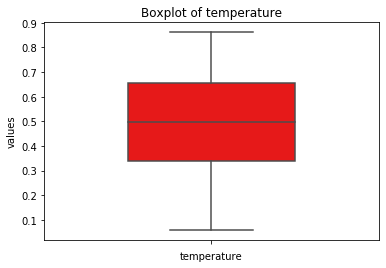

atemp


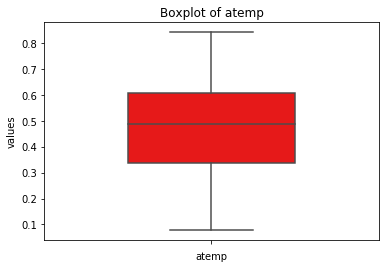

humidity


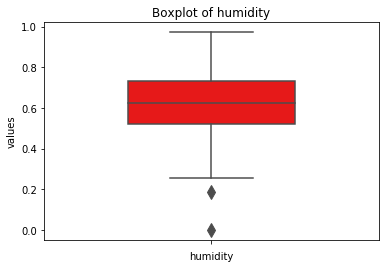

windspeed


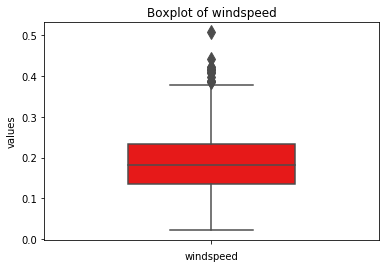

count


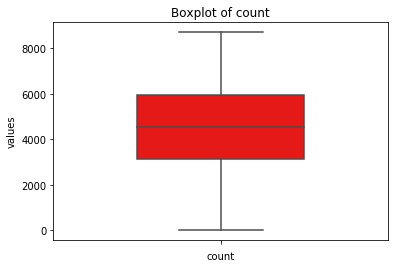

In [16]:
for i in cnames:
    print(i)
    sns.boxplot(y=df[i], color='r', width=0.5, saturation=0.80,  fliersize=10)
    plt.xlabel(i)
    plt.ylabel('values')
    plt.title('Boxplot of ' +i)
    plt.show()

From above Boxplots "humidity" and "windspeed" have outliers

In [17]:
# Calculate Lower fence, Upper fence and iqr

for i in cnames:
    print(i)
    q75,q25 = np.percentile(df.loc[:,i],[75,25])
    iqr = q75-q25
    minimum = q25-(iqr*1.5)
    maximum = q75+(iqr*1.5)
    print("MIN = "+str(minimum))
    print("MAX = "+str(maximum))
    print("IQR = "+str(iqr))
    
# Replace outliers with NA
df.loc[df[i]<minimum,i]=np.nan
df.loc[df[i]>maximum,i]=np.nan

temperature
MIN = -0.14041600000000015
MAX = 1.1329160000000003
IQR = 0.3183330000000001
atemp
MIN = -0.06829675000000018
MAX = 1.0147412500000002
IQR = 0.2707595000000001
humidity
MIN = 0.20468725
MAX = 1.0455212500000002
IQR = 0.21020850000000002
windspeed
MIN = -0.012446750000000034
MAX = 0.38061125
IQR = 0.0982645
count
MIN = -1054.0
MAX = 10162.0
IQR = 2804.0


In [18]:
# Imputation of NA with median 
df['humidity']=df['humidity'].fillna(df['humidity'].median())
df['windspeed']=df['windspeed'].fillna(df['windspeed'].median())

In [19]:
# Checking NA in Data 
print(df.isnull().sum())

season         0
year           0
month          0
holiday        0
weekday        0
workingday     0
weather        0
temperature    0
atemp          0
humidity       0
windspeed      0
count          0
dtype: int64


# Understanding Data through Visualization

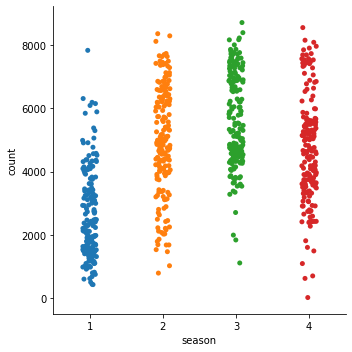

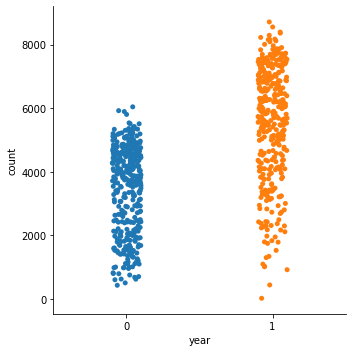

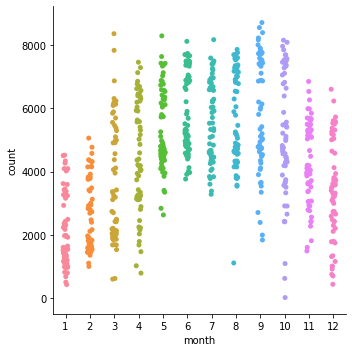

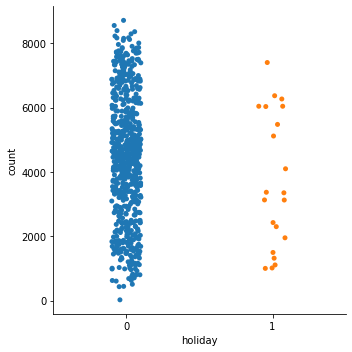

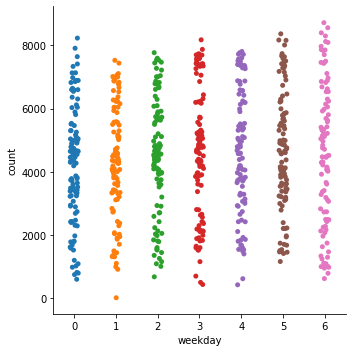

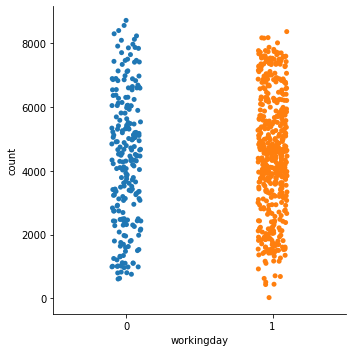

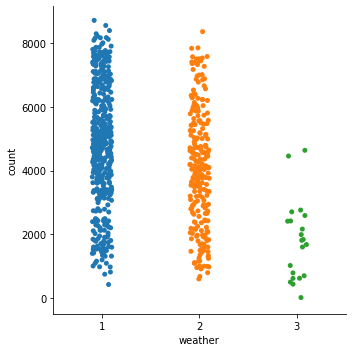

In [20]:
for i in cat_names:
    sns.catplot(x=i,y='count', data=df)
    visuals = str(i)+'.pdf'
    plt.savefig(visuals)

1.) season vs count : Summer, Fall and Winter has more count as compared to Spring season with almost between 4000 to 8000 bike count on daily basis 
2.) year vs count : the count of bike rented increased in the year 2012 as compared to 2011
3.) month vs count : the count goes on increases gradually from march and reaches maximum up to october and slightly decreases in november and december.
4.) holiday vs coount : the count of bike rented is much high on holidays as compared to working day
5.) week day vs count : bike count is maximum on day 5 and 6 as per the weekdays
6.) working day vs count : the count is slightly increased on week ends as compared to working days 
7.) weather vs count : the count of bike rented is maximum on days having clear weather with few or partly cloudy as compared to days with mist combined with clouds and least in bad weather

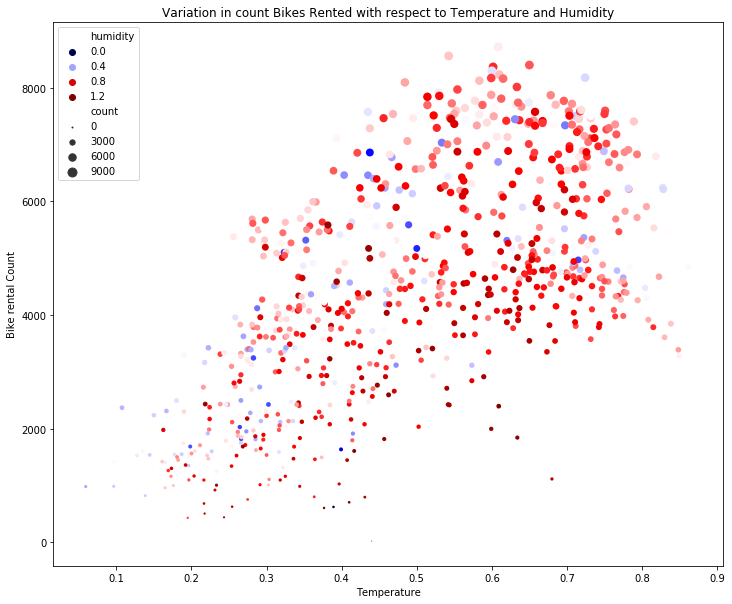

In [21]:
f, ax = plt.subplots(figsize=(12,10))
sns.scatterplot(x='temperature', y='count', hue='humidity', size='count', palette='seismic',
               sizes=(1,80), linewidth=0, data=df, ax=ax)
plt.title("Variation in count Bikes Rented with respect to Temperature and Humidity")
plt.ylabel("Bike rental Count")
plt.xlabel("Temperature")
plt.savefig("temp_humidity_vscount.pdf")

Accoring the  Scatterplot ploted above the maximum no of bikes rented is found when the temperature is between scale 0.5 to 0.8 and humidity below 0.8

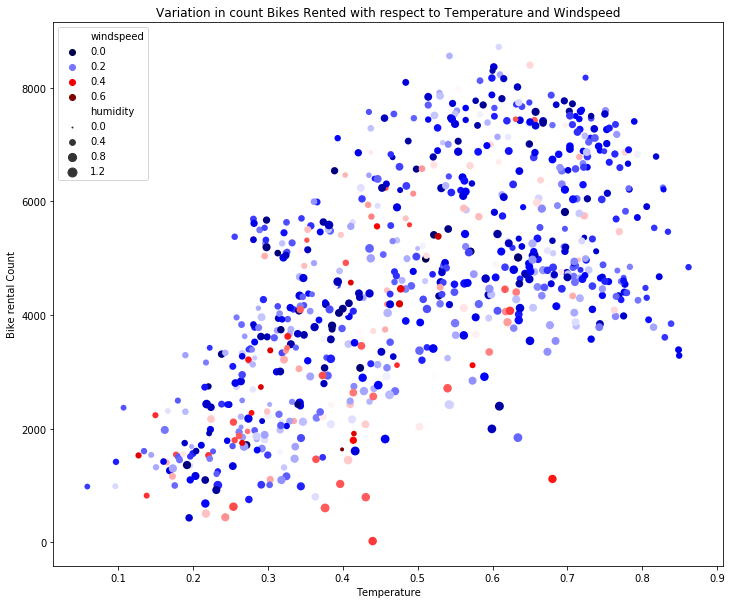

In [22]:
f, ax = plt.subplots(figsize=(12,10))
sns.scatterplot(x='temperature', y='count', hue='windspeed', size='humidity', palette='seismic',
               sizes=(1,80), linewidth=0, data=df, ax=ax)
plt.title("Variation in count Bikes Rented with respect to Temperature and Windspeed")
plt.ylabel("Bike rental Count")
plt.xlabel("Temperature")
plt.savefig("temp_wind_vscount.pdf")

Accoring the Scatterplot ploted above the maximum no of bikes rented is found when the temperature is between scale 0.5 to 0.8 and humidity below 0.8 and windspeed below 0.2

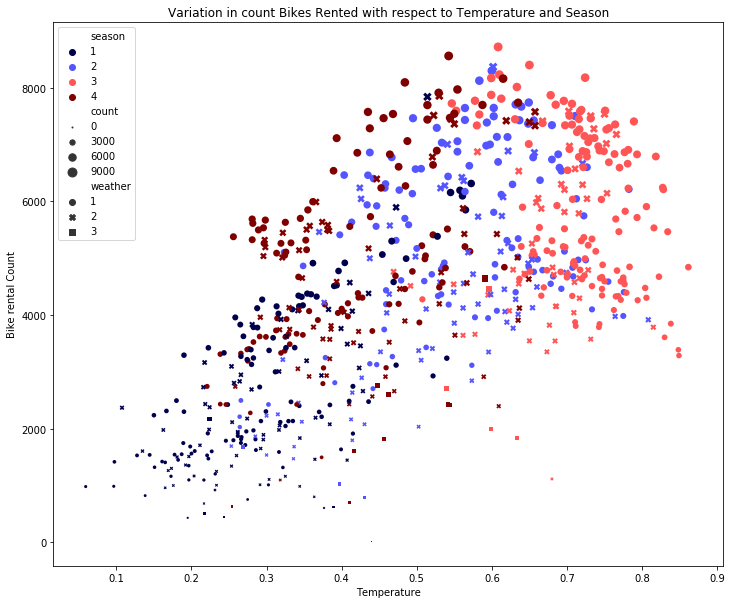

In [23]:
f, ax = plt.subplots(figsize=(12,10))
sns.scatterplot(x='temperature', y='count', hue='season', size='count', style='weather', palette='seismic',
               sizes=(1,80), linewidth=0, data=df, ax=ax)
plt.title("Variation in count Bikes Rented with respect to Temperature and Season")
plt.ylabel("Bike rental Count")
plt.xlabel("Temperature")
plt.savefig("temp_season_vscount.pdf")

Accoring the Scatterplot ploted above the maximum no of bikes rented is found during Season 1,2 and 4 when the temperature is between scale 0.5 to 0.8 and weather is 1 and 2 even in it weather 1 is more

# Feature Selection 

In [24]:
# Correlation analysis for numeric variables 

#extracting numeric variables
df_corr = df.loc[:,cnames]

#generating correlation matrix 
corr_matrix = df_corr.corr()
print(corr_matrix)

             temperature     atemp  humidity  windspeed     count
temperature     1.000000  0.991702  0.126963  -0.157944  0.627494
atemp           0.991702  1.000000  0.139988  -0.183643  0.631066
humidity        0.126963  0.139988  1.000000  -0.248489 -0.100659
windspeed      -0.157944 -0.183643 -0.248489   1.000000 -0.234545
count           0.627494  0.631066 -0.100659  -0.234545  1.000000


Text(0.5, 1, 'Correlation_plot')

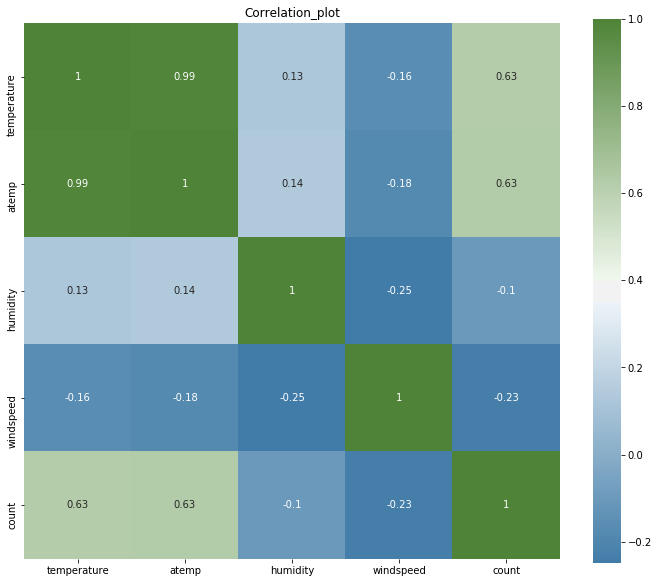

In [25]:
#correlation plot
f, ax= plt.subplots(figsize=(12,10))
sns.heatmap(corr_matrix,mask=np.zeros_like(corr_matrix,dtype=np.bool),
            cmap=sns.diverging_palette(240,120,as_cmap=True), square=True, ax=ax, annot=True)
plt.title('Correlation_plot')

According to correlation plot we find that temperature and atemp are highly correlated and hence need to drop atemp variable

In [26]:
#Anova test 

import statsmodels.api as sm
from statsmodels.formula.api import ols

label = 'count'
for i in cat_names:
    frame = label +' ~ '+i
    model = ols(frame, data=df).fit()
    anova = sm.stats.anova_lm(model, type=2)
    print(anova)

             df        sum_sq       mean_sq           F        PR(>F)
season      1.0  4.517974e+08  4.517974e+08  143.967653  2.133997e-30
Residual  729.0  2.287738e+09  3.138187e+06         NaN           NaN
             df        sum_sq       mean_sq           F        PR(>F)
year        1.0  8.798289e+08  8.798289e+08  344.890586  2.483540e-63
Residual  729.0  1.859706e+09  2.551038e+06         NaN           NaN
             df        sum_sq       mean_sq          F        PR(>F)
month       1.0  2.147445e+08  2.147445e+08  62.004625  1.243112e-14
Residual  729.0  2.524791e+09  3.463362e+06        NaN           NaN
             df        sum_sq       mean_sq         F    PR(>F)
holiday     1.0  1.279749e+07  1.279749e+07  3.421441  0.064759
Residual  729.0  2.726738e+09  3.740381e+06       NaN       NaN
             df        sum_sq       mean_sq         F    PR(>F)
weekday     1.0  1.246109e+07  1.246109e+07  3.331091  0.068391
Residual  729.0  2.727074e+09  3.740843e+06       NaN

According to anova test we find the variables "weekday", "workingday" and "holiday" have pr > 0.05 so we need to drop them

In [27]:
# Droping the reductant variables 
df = df.drop(['atemp', 'holiday', 'weekday', 'workingday'], axis=1)
df.shape

(731, 8)

In [28]:
df.head()

,season,year,month,weather,temperature,humidity,windspeed,count
0,1,0,1,2,0.344167,0.805833,0.160446,985.0
1,1,0,1,2,0.363478,0.696087,0.248539,801.0
2,1,0,1,1,0.196364,0.437273,0.248309,1349.0
3,1,0,1,1,0.200000,0.590435,0.160296,1562.0
4,1,0,1,1,0.226957,0.436957,0.186900,1600.0


In [29]:
df.describe()

,season,year,month,weather,temperature,humidity,windspeed,count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,1.395349,0.495385,0.627894,0.190486,4504.348837
std,1.110807,0.500342,3.451913,0.544894,0.183051,0.142429,0.077498,1937.211452
min,1.000000,0.000000,1.000000,1.000000,0.059130,0.000000,0.022392,22.000000
25%,2.000000,0.000000,4.000000,1.000000,0.337083,0.520000,0.134950,3152.000000
50%,3.000000,1.000000,7.000000,1.000000,0.498333,0.626667,0.180975,4548.000000
75%,3.000000,1.000000,10.000000,2.000000,0.655417,0.730209,0.233214,5956.000000
max,4.000000,1.000000,12.000000,3.000000,0.861667,0.972500,0.507463,8714.000000


In [30]:
# Updating Numeric and categorical variables 
# categorical variables 
cat_names=['season', 'year', 'month', 'weather']

# Numerical variables
cnames=['temperature', 'humidity', 'windspeed', 'count']

# Feature Scaling

temperature


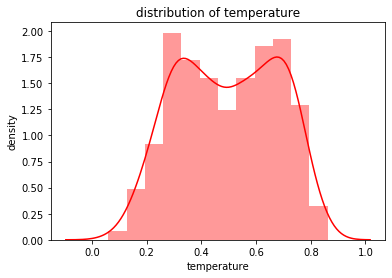

humidity


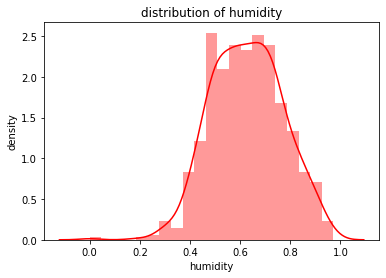

windspeed


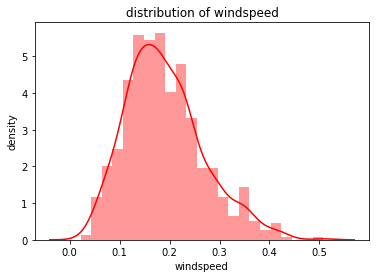

count


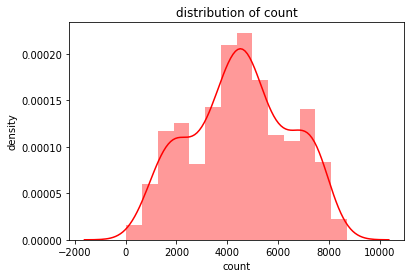

In [31]:
# Distribution plot to check weather the data is normalised or not

for i in cnames:
    print(i)
    sns.distplot(df[i], bins='auto', color='Red')
    plt.title('distribution of '+i)
    plt.ylabel('density')
    plt.show()

According to distribution plot all data is Normalized

# Train-Test-Split

In [32]:
df1=df
#df=df1

In [33]:
df = pd.get_dummies(df,columns=cat_names)
df.shape

(731, 25)

In [34]:
df.head()

,temperature,humidity,windspeed,count,season_1,season_2,season_3,season_4,year_0,year_1,...,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weather_1,weather_2,weather_3
0,0.344167,0.805833,0.160446,985.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0.363478,0.696087,0.248539,801.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0.196364,0.437273,0.248309,1349.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0.200000,0.590435,0.160296,1562.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0.226957,0.436957,0.186900,1600.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [40]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [36]:
# Error Metrics 
def MAPE(y_true, y_prediction):
    mape = np.mean(np.abs(y_true - y_prediction)/y_true)*100
    return mape

In [37]:
# Split data into predictor and Target 
X = df.drop(['count'], axis=1)
Y = df['count']

In [38]:
# Dividing data into train-test 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = .20, random_state=0)

# Decision Tree

In [42]:
# import libraries 
from sklearn.tree import DecisionTreeRegressor

DT_model = DecisionTreeRegressor(max_depth=2).fit(X_train,Y_train)

# prediction on train data
DT_train = DT_model.predict(X_train)

# Prediction on test data 
DT_test = DT_model.predict(X_test)

# performance on train data
MAPE_train = MAPE(Y_train, DT_train)

# performance on test data
MAPE_test = MAPE(Y_test, DT_test)

# r2 value for train data 
r2_train = r2_score(Y_train, DT_train)

# r2 value for test data
r2_test = r2_score(Y_test, DT_test)

# RMSE value for train data
RMSE_train = np.sqrt(metrics.mean_squared_error(Y_train, DT_train))

# RMSE value for test data
RMSE_test = np.sqrt(metrics.mean_squared_error(Y_test, DT_test))

print('Mean Absolute Percentage Error for train data = '+str(MAPE_train))
print('Mean Absolute Percentage Error for test data = '+str(MAPE_test))
print('R^2_score for train data = '+str(r2_train))
print('R^2_score for test data = '+str(r2_test))
print("RMSE for train data="+str(RMSE_train))
print("RMSE for test data="+str(RMSE_test))

Mean Absolute Percentage Error for train data = 62.26013293672567
Mean Absolute Percentage Error for test data = 36.94809301452646
R^2_score for train data = 0.6775629218593628
R^2_score for test data = 0.6464697716428666
RMSE for train data=1080.3818579492188
RMSE for test data=1226.2196190864843


In [43]:
DT1 = {'Model Name': ['Decision Tree'], 'MAPE_Train':[MAPE_train], 'MAPE_Test':[MAPE_test], 
       'R^2_train':[r2_train], 'R^2_test':[r2_test], 'RMSE_train':[RMSE_train], 'RMSE_test':[RMSE_test]}
result1 = pd.DataFrame(DT1)

# Random Forest

In [44]:
# Import Libraries
from sklearn.ensemble import RandomForestRegressor

RF_model = RandomForestRegressor(n_estimators=100).fit(X_train,Y_train)

# prediction on train data
RF_train = RF_model.predict(X_train)

# Prediction on test data 
RF_test = RF_model.predict(X_test)

# performance on train data
MAPE_train = MAPE(Y_train, RF_train)

# performance on test data
MAPE_test = MAPE(Y_test, RF_test)

# r2 value for train data 
r2_train = r2_score(Y_train, RF_train)

# r2 value for test data
r2_test = r2_score(Y_test, RF_test)

# RMSE value for train data
RMSE_train = np.sqrt(metrics.mean_squared_error(Y_train,RF_train))

# RMSE value for test data
RMSE_test = np.sqrt(metrics.mean_squared_error(Y_test,RF_test))

print('Mean Absolute Percentage Error for train data = '+str(MAPE_train))
print('Mean Absolute Percentage Error for test data = '+str(MAPE_test))
print('R^2_score for train data = '+str(r2_train))
print('R^2_score for test data = '+str(r2_test))
print("RMSE for train data="+str (RMSE_train))
print("RMSE for test data="+str(RMSE_test))

Mean Absolute Percentage Error for train data = 15.367102161378016
Mean Absolute Percentage Error for test data = 20.22267871052817
R^2_score for train data = 0.9807500985169355
R^2_score for test data = 0.8853268793110791
RMSE for train data=263.97879975165034
RMSE for test data=698.3703605557162


In [45]:
RF1 = {'Model Name': ['Random Forest'], 'MAPE_Train':[MAPE_train], 'MAPE_Test':[MAPE_test], 
       'R^2_train':[r2_train], 'R^2_test':[r2_test], 'RMSE_train':[RMSE_train], 'RMSE_test':[RMSE_test]}
result2 = pd.DataFrame(RF1)

In [46]:
result = result1.append(result2)

# Linear Regression Model

In [47]:
#import Libraries
import statsmodels.api as sm

LR_model = sm.OLS(Y_train,X_train).fit()
print(LR_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     145.2
Date:                Mon, 29 Jun 2020   Prob (F-statistic):          4.07e-207
Time:                        14:54:04   Log-Likelihood:                -4707.6
No. Observations:                 584   AIC:                             9457.
Df Residuals:                     563   BIC:                             9549.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
temperature  4861.4866    470.566     10.331      

In [48]:
# prediction on train data
LR_train = LR_model.predict(X_train)

# Prediction on test data 
LR_test = LR_model.predict(X_test)

# performance on train data
MAPE_train = MAPE(Y_train, LR_train)

# performance on test data
MAPE_test = MAPE(Y_test, LR_test)

# r2 value for train data 
r2_train = r2_score(Y_train, LR_train)

# r2 value for test data
r2_test = r2_score(Y_test, LR_test)

# RMSE value for train data
RMSE_train = np.sqrt(metrics.mean_squared_error(Y_train,LR_train))

# RMSE value for test data
RMSE_test = np.sqrt(metrics.mean_squared_error(Y_test,LR_test))

print('Mean Absolute Percentage Error for train data = '+str(MAPE_train))
print('Mean Absolute Percentage Error for test data = '+str(MAPE_test))
print('R^2_score for train data = '+str(r2_train))
print('R^2_score for test data = '+str(r2_test))
print("RMSE for train data="+str (RMSE_train))
print("RMSE for test data="+str(RMSE_test))

Mean Absolute Percentage Error for train data = 43.78140724487472
Mean Absolute Percentage Error for test data = 20.042233295431416
R^2_score for train data = 0.8376458444602071
R^2_score for test data = 0.838132097806852
RMSE for train data=766.6312156108335
RMSE for test data=829.7272484647344


In [49]:
LR1 = {'Model Name': ['Linear Regression'], 'MAPE_Train':[MAPE_train], 'MAPE_Test':[MAPE_test], 
       'R^2_train':[r2_train], 'R^2_test':[r2_test], 'RMSE_train':[RMSE_train], 'RMSE_test':[RMSE_test]}
result3 = pd.DataFrame(LR1)

In [50]:
result = result.append(result3)

In [51]:
result = result.reset_index(drop=True)

# Final Result

In [52]:
result

,Model Name,MAPE_Train,MAPE_Test,R^2_train,R^2_test,RMSE_train,RMSE_test
0,Decision Tree,62.260133,36.948093,0.677563,0.646470,1080.381858,1226.219619
1,Random Forest,15.367102,20.222679,0.980750,0.885327,263.978800,698.370361
2,Linear Regression,43.781407,20.042233,0.837646,0.838132,766.631216,829.727248


According to the results of all the models, observing all MAPE and R^2 values we conclude that Random Forest has minimum MAPE value (20.042) and its R^2 value is maximum (0.83) and  RSME value is (698.37). therefore selected as best model among above.